# Data Analyis: Triangular Arbitrage for Crytocurrency

Project Tasks: 
 (i) (6 points) Using the available historical data provided (the included csv files , date range: 3/10/2018--3/10/2019), plot the time series (line charts) of the two BTC-USD prices (derived and observed) on the same figure over this period. Note to use the “Price” column in each “csv” data instead of “Open”, “High” “Low” columns. Also note the date column is in reverse order, you may or may not need to sort it.

(ii) (6 points) Compute the spread (i.e. difference between the two time series) and plot its time series.
Compute the mean and standard deviation during this period (3/10/2018--3/10/2019). Also, show the histogram of the daily spreads to see its distribution.

(iii) (6 points) Now repeat parts (i)-(ii) for Litecoin (LTC). That is, replace ETH above with LTC. You’ll need LTC-USD, LTC-BTC, and BTC-USD.
Note: you may find the relevant prices using these links: link1, link2, link3(The links are provided for information purpose. All the input data has been provided as csv files)

If you think further, you can replace LTC with other coins, and also BTC with another major crypto or Stablecoin. There are truly numerous combinations for triangular arbitrage in the crypto market! (Note: not your task)

Hint1: Your output should be similar or identical to the figures in “I(a) Sample Output” folder. Feel free to create your own plot titles and labels as you see fit.
Hint2: One of the input column has string dollar amount value similar to “4,000”. You will need to convert to numeric value 4000 before plot charts. You may consider replace or other functions to remove the comma in “4,000”.  


In [33]:
import pandas as pd
import numpy as np
import os
os.getcwd()
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
btc_usd = pd.read_csv('BTC_USD Bittrex Historical Data.csv') #importing the dataframe

In [35]:
btc_usd['Date'] = pd.to_datetime(btc_usd['Date']) #changing the date column dtype from string to datetime

btc_usd.sort_values(by='Date', inplace = True) #sorting the dates from oldest to newest.

btc_usd.set_index("Date", inplace = True)

btc_usd = btc_usd.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1) #droping cols that are not needed. 


btc_usd #output of the new dataframe

,Price
Date,
2018-03-10,"8,750.5"
2018-03-11,"9,541.0"
2018-03-12,"9,150.4"
2018-03-13,"9,156.9"
2018-03-14,"8,189.0"
...,...
2019-03-06,"3,868.4"
2019-03-07,"3,880.5"
2019-03-08,"3,870.6"


In [36]:
#chaning price from string object dtype to float64 dtype using to_numeric function and .replace function
btc_usd['Price'] = pd.to_numeric(btc_usd['Price'].replace('[^0-9\.-]', '', regex=True)) 

In [37]:
btc_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-03-10 to 2019-03-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


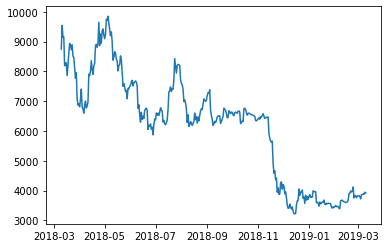

In [38]:
plt.plot(btc_usd)

In [39]:
eth_usd = pd.read_csv('ETH_USD Bittrex Historical Data.csv')
eth_usd['Date'] = pd.to_datetime(eth_usd['Date'])
eth_usd.sort_values(by='Date', inplace = True)
eth_usd.set_index("Date", inplace = True)
eth_usd = eth_usd.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
eth_usd

,Price
Date,
2018-03-10,684.38
2018-03-11,722.47
2018-03-12,695.70
2018-03-13,688.10
2018-03-14,610.00
...,...
2019-03-06,137.51
2019-03-07,136.59
2019-03-08,133.52


In [40]:
eth_btc = pd.read_csv('ETH_BTC Bittrex Historical Data.csv')
eth_btc['Date'] = pd.to_datetime(eth_btc['Date'])
eth_btc.sort_values(by='Date', inplace = True)
eth_btc.set_index("Date", inplace = True)
eth_btc = eth_btc.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
eth_btc

,Price
Date,
2018-03-10,0.077900
2018-03-11,0.075559
2018-03-12,0.076400
2018-03-13,0.075410
2018-03-14,0.074346
...,...
2019-03-06,0.035531
2019-03-07,0.035256
2019-03-08,0.034568


In [41]:
derived_btc_usd = pd.DataFrame()

In [42]:
for date in range (len(eth_btc)):
    derived = eth_usd['Price'] / eth_btc['Price']
    
derived_btc_usd = derived
derived_btc_usd

Date
2018-03-10    8785.365854
2018-03-11    9561.667042
2018-03-12    9106.020942
2018-03-13    9124.784511
2018-03-14    8204.879886
                 ...     
2019-03-06    3870.141567
2019-03-07    3874.234173
2019-03-08    3862.531821
2019-03-09    3940.506583
2019-03-10    3915.648700
Name: Price, Length: 366, dtype: float64

Text(0, 0.5, 'Coin Prices')

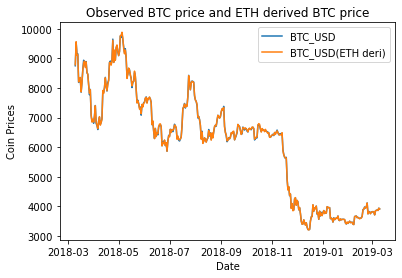

In [43]:
plt.plot(btc_usd, label = 'BTC_USD')
plt.plot(derived_btc_usd, label = 'BTC_USD(ETH deri)')
plt.title('Observed BTC price and ETH derived BTC price', fontsize= 12)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Coin Prices')

In [44]:
difference_btc_usd = pd.DataFrame()

for date in range (len(eth_btc)):
    derived = eth_usd['Price'] / eth_btc['Price']
    difference = btc_usd['Price'] - derived
    
difference_btc_usd = difference
difference

Date
2018-03-10   -34.865854
2018-03-11   -20.667042
2018-03-12    44.379058
2018-03-13    32.115489
2018-03-14   -15.879886
                ...    
2019-03-06    -1.741567
2019-03-07     6.265827
2019-03-08     8.068179
2019-03-09     3.093417
2019-03-10    -0.348700
Name: Price, Length: 366, dtype: float64

Text(0, 0.5, 'Prices Spread')

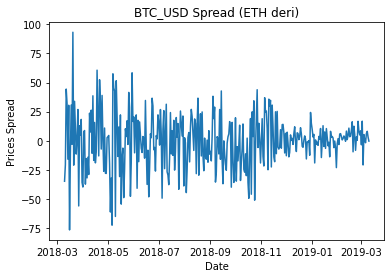

In [55]:
plt.plot(difference)
plt.title('BTC_USD Spread (ETH deri)')
plt.xlabel('Date')
plt.ylabel('Prices Spread')

In [56]:
difference.mean()

-0.3571190908757008

In [57]:
difference.std()

22.692223937267816

In [58]:
ltc_usd = pd.read_csv('LTC_USD Bittrex Historical Data.csv')
ltc_usd['Date'] = pd.to_datetime(ltc_usd['Date'])
ltc_usd.sort_values(by='Date', inplace = True)
ltc_usd.set_index("Date", inplace = True)
ltc_usd = ltc_usd.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)

In [59]:
ltc_btc = pd.read_csv('LTC_BTC Bittrex Historical Data.csv')
ltc_btc['Date'] = pd.to_datetime(ltc_btc['Date'])
ltc_btc.sort_values(by='Date', inplace = True)
ltc_btc.set_index("Date", inplace = True)
ltc_btc = ltc_btc.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)

In [60]:
derived_btc_usd_2 = pd.DataFrame()

In [61]:
for date in range (len(eth_btc)):
    derived = ltc_usd['Price'] / ltc_btc['Price']
    
derived_btc_usd_2 = derived

Text(0, 0.5, 'Coin Prices')

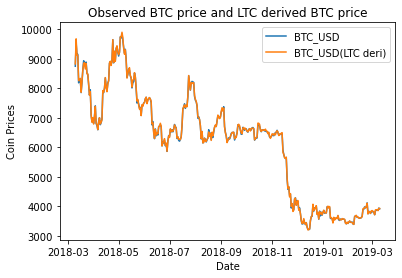

In [62]:
plt.plot(btc_usd, label = 'BTC_USD')
plt.plot(derived_btc_usd_2, label = 'BTC_USD(LTC deri)')
plt.title('Observed BTC price and LTC derived BTC price', fontsize= 12)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Coin Prices')

In [63]:
difference_btc_usd_2 = pd.DataFrame()

for date in range (len(ltc_btc)):
    derived_2 = ltc_usd['Price'] / ltc_btc['Price']
    difference_2 = btc_usd['Price'] - derived_2
    
difference_btc_usd_2 = difference_2

Text(0, 0.5, 'Prices Spread')

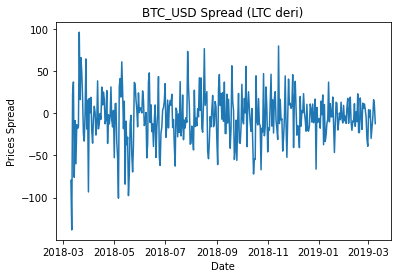

In [64]:
plt.plot(difference_2)
plt.title('BTC_USD Spread (LTC deri)')
plt.xlabel('Date')
plt.ylabel('Prices Spread')

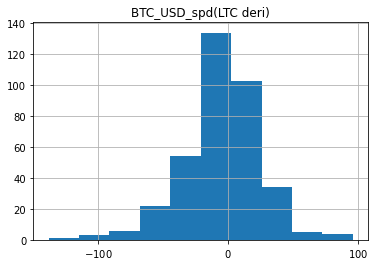

In [90]:
plt.hist(difference_2)
plt.grid(True)
plt.title('BTC_USD_spd(LTC deri)')
plt.xticks([-100, 0, 100], ['$-100$', '$0$', '$100$'])
plt.show()

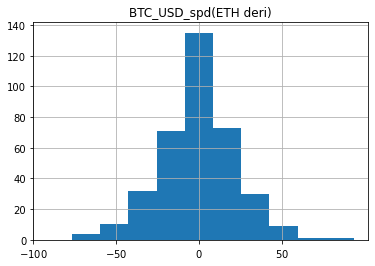

In [94]:

plt.hist(difference)
plt.grid(True)
plt.title('BTC_USD_spd(ETH deri)')
plt.xticks([-100, -50, 0, 50], ['$-100$', '$-50$', '$0$', '$50$'])
plt.show()